# PIMA Indians Diabetes
#### Background Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.
### Description

#### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Pregnancies: Number of times pregnant
#### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
####  BloodPressure: Diastolic blood pressure (mm Hg)
####  SkinThickness: Triceps skin fold thickness (mm)
####  Insulin: 2-Hour serum insulin (mu U/ml)
####  BMI: Body mass index (weight in kg/(height in m)^2)
####  DiabetesPedigreeFunction: Diabetes pedigree function
####  Age: Age (years)
####  Outcome: Class variable (0 or 1)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')  #import dataset
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking Null Values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

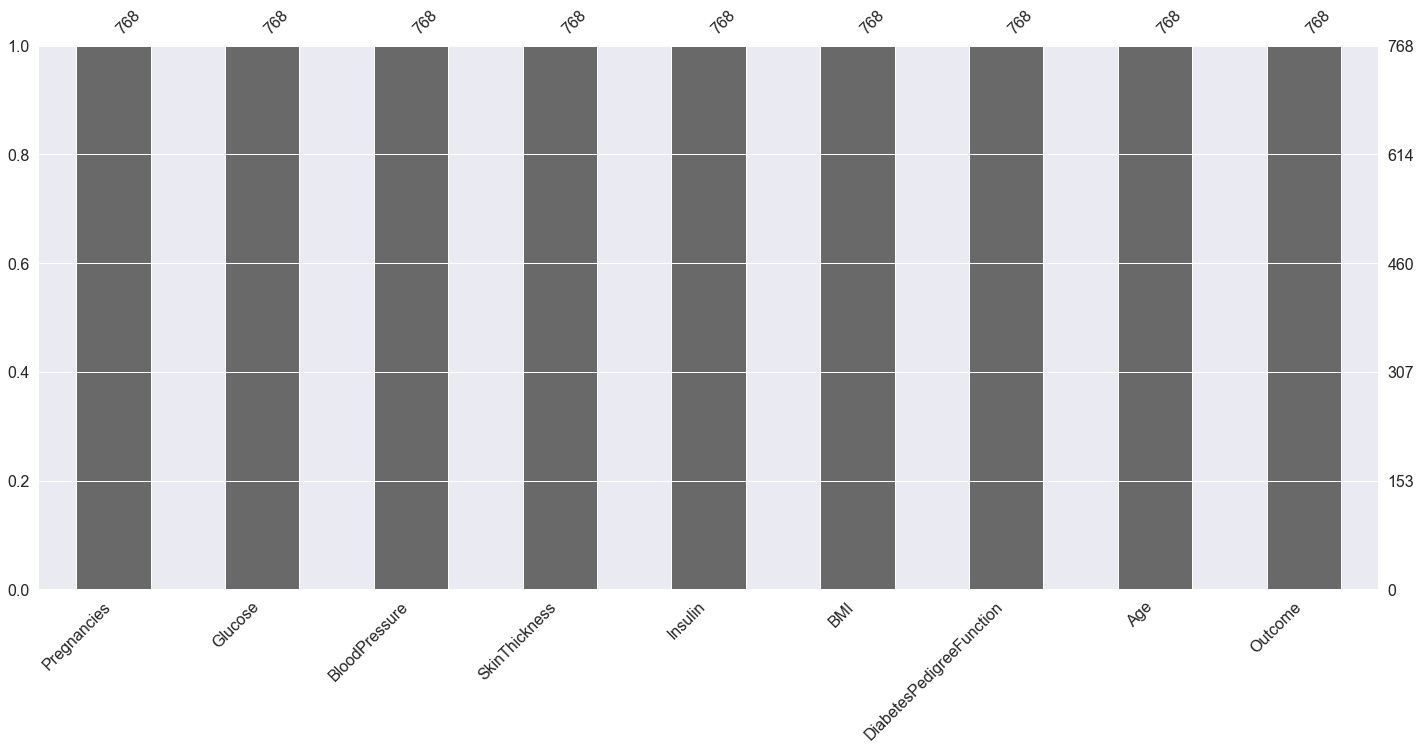

In [7]:
import missingno as msno
msno.bar(data)
plt.show()

## Correlation Matrix

#### Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

#### A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

<AxesSubplot:>

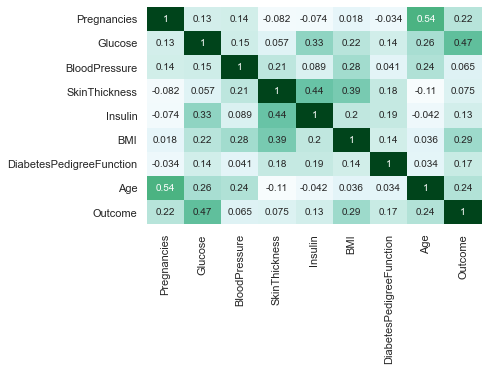

In [8]:
#Correlation Matrix
sns.heatmap(data.corr(),cbar=False,cmap='BuGn',annot=True)

#### Can minimum value of below listed columns be zero (0)?

#### On these columns, a value of zero does not make sense and thus indicates missing value.

#### Following columns or variables have an invalid zero value:

#### Glucose
#### BloodPressure
#### SkinThickness
#### Insulin
#### BMI

In [9]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

In [10]:
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

## Exploratory Data Analysis

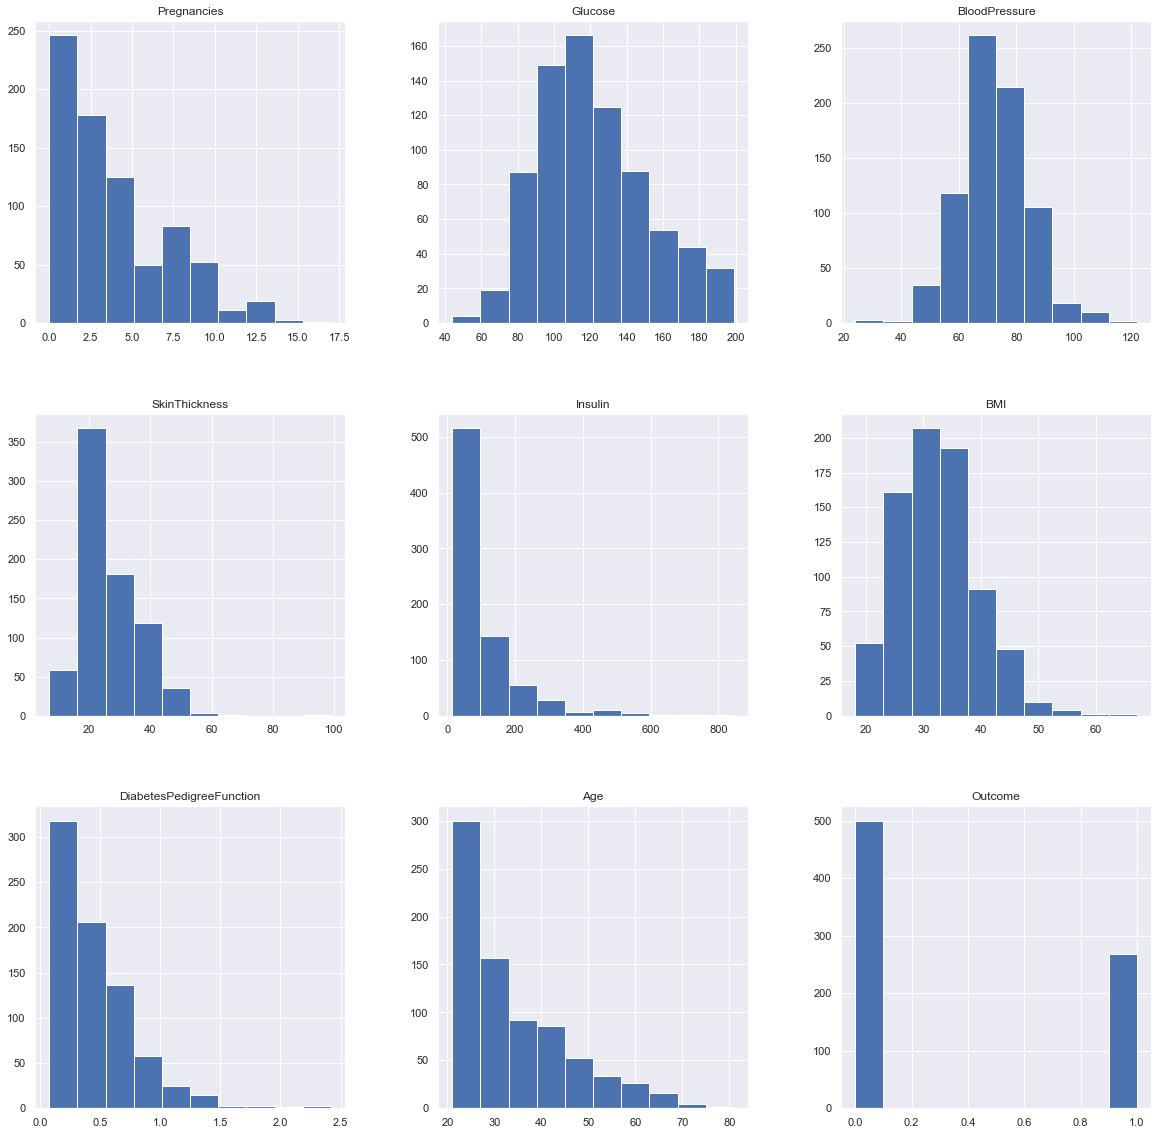

In [11]:
p=data.hist(figsize = (20,20))

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

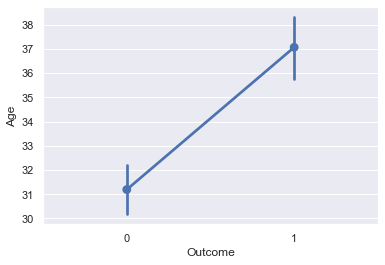

In [12]:
sns.pointplot(x='Outcome', y= 'Age', data=data)

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

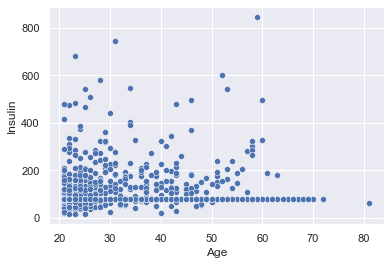

In [13]:
sns.scatterplot(x='Age',y='Insulin',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

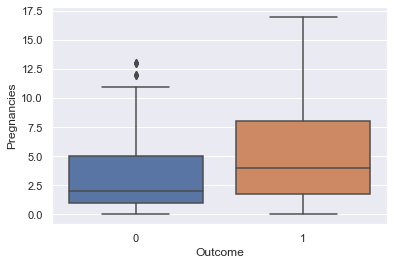

In [14]:
sns.boxplot(x='Outcome',y='Pregnancies',data=data)

## Pairplot

#### Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

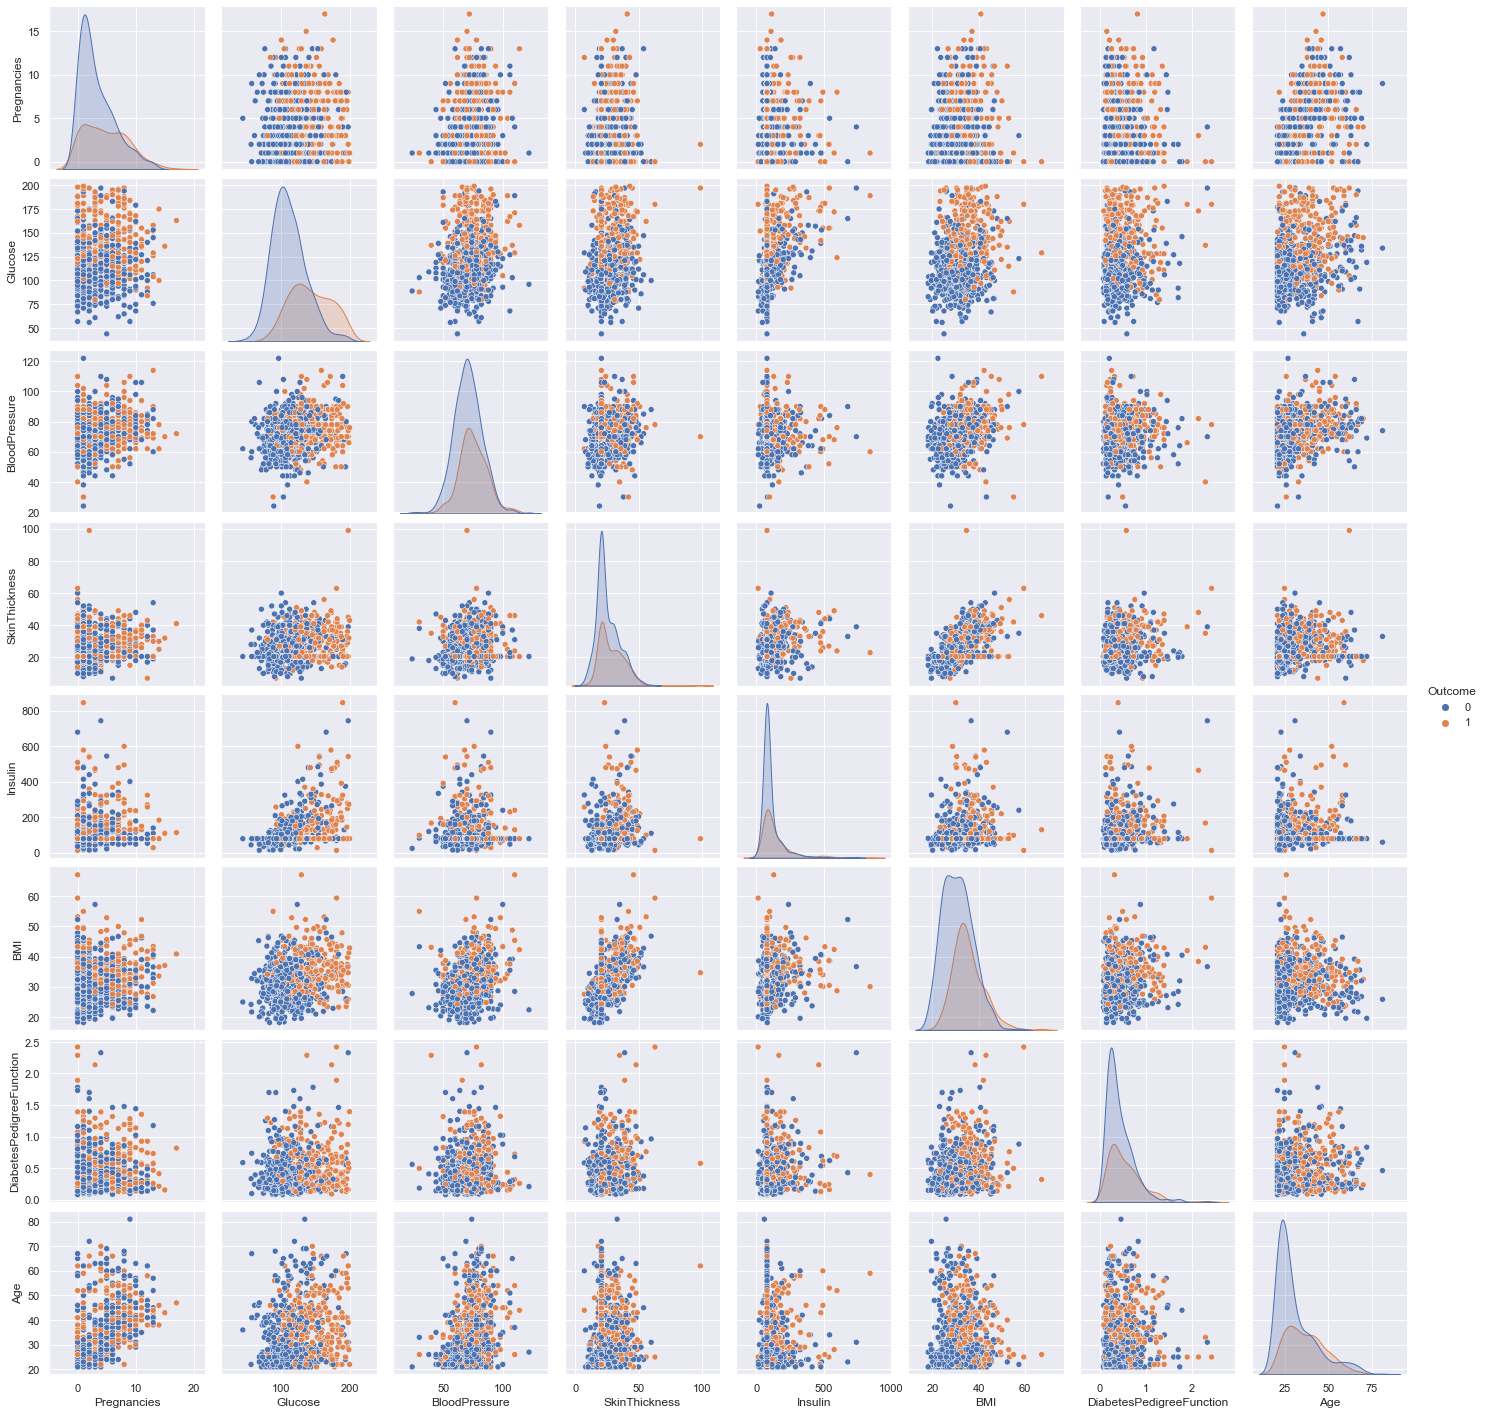

In [15]:
sns.pairplot(data,hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

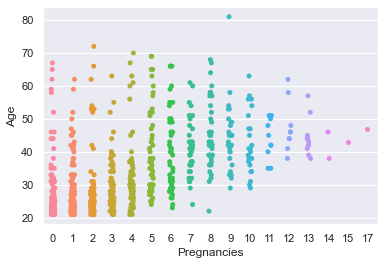

In [16]:
sns.stripplot(x='Pregnancies',y='Age',data=data)

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

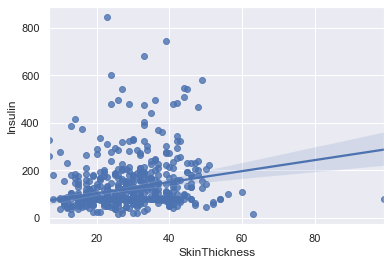

In [17]:
sns.regplot(x='SkinThickness', y= 'Insulin', data=data)

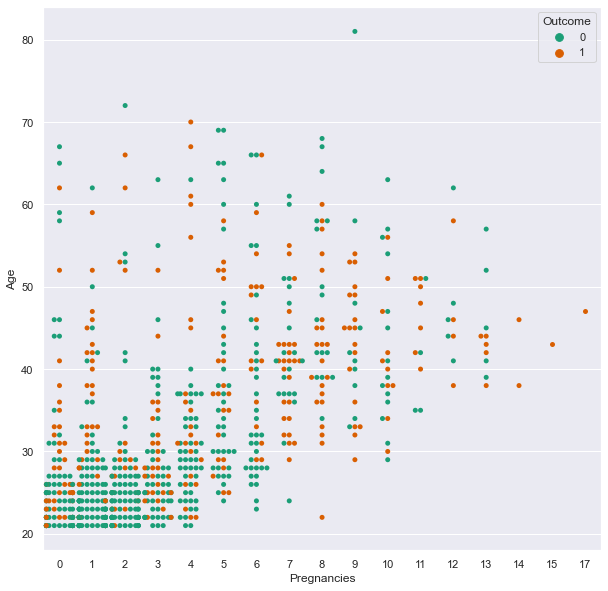

In [18]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="Pregnancies", y="Age", hue="Outcome",
              palette="Dark2", data=data)
ax=sns.set(style="darkgrid")

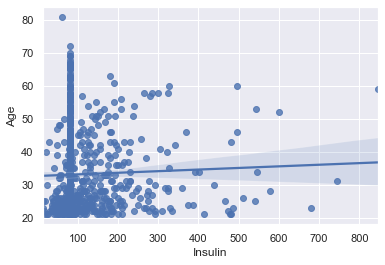

In [19]:
g = sns.regplot(x='Insulin',y='Age',data=data)

In [20]:
data.var()

Pregnancies                   11.354056
Glucose                      926.351048
BloodPressure                146.795798
SkinThickness                 92.760798
Insulin                     8663.952981
BMI                           47.270761
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [22]:
y=data.Outcome

## Models

In [23]:
from sklearn.model_selection import train_test_split                #splitting the dataset
                                                                 
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.50,random_state=3)

In [24]:
# 1.Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:79.42708333333334
Test Set Accuracy:76.04166666666666


In [25]:
# 2.KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:80.98958333333334
Test Set Accuracy:72.39583333333334


In [26]:
# 3.SVC
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,Y_train)    

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:86.71875
Test Set Accuracy:73.69791666666666


In [27]:
# 4.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:86.45833333333334
Test Set Accuracy:72.39583333333334


In [28]:
# 5.GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Train Set Accuracy:96.61458333333334
Test Set Accuracy:75.78125


## 7.Stacking
#### Stacking is the ensemble technique.In this,two or more classifiers act as base model and the prediction of those will be the x value for the other model(i.e meta-data)

In [29]:
from sklearn.model_selection import train_test_split                #splitting the dataset
                                                                 
train,val_train,test,val_test = train_test_split(X,y,test_size=.50,random_state=3)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=.20,random_state=3)

In [31]:
#first model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
# second model
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [33]:
pred_1=knn.predict(val_train)

In [34]:
pred_2=svm.predict(val_train)

In [35]:
# addition of 2 predictions
result = np.column_stack((pred_1,pred_2))

In [36]:
pred_test1=knn.predict(x_test)
pred_test2=svm.predict(x_test)

In [37]:
predict_test=np.column_stack((pred_test1,pred_test2))

In [38]:
# stacking classifier
#RandomForestClasifier:- In this prediction of other 2 classification is taken as x value
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(result,val_test)

RandomForestClassifier()

In [39]:
rand_clf.score(result,val_test)

0.7291666666666666

In [40]:
rand_acc=accuracy_score(y_test ,rand_clf.predict(predict_test))
rand_acc

0.7922077922077922

In [41]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC', 'Decision Tree Classifier',
             'Gradient Boosting Classifier', 'Stacking'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, gbc_acc, rand_acc,]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Stacking,0.792208
0,Logistic,0.760417
4,Gradient Boosting Classifier,0.757812
2,SVC,0.736979
1,KNN,0.723958
3,Decision Tree Classifier,0.723958


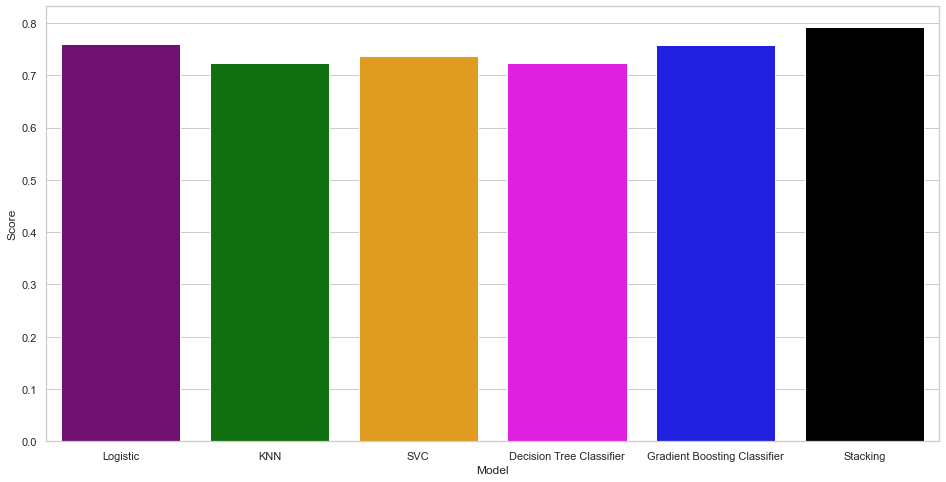

In [42]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()